In [32]:
# import packages for analysis
%matplotlib inline
import pickle as pkl
import numpy as np, os, sys, subprocess
import matplotlib.pyplot as plt, pandas as pd
import seaborn as sns
import glob
import re

In [43]:

#sm-2_k-0_lag-10_AT-all_dist_40-250000-190_score.pkl
cv_dir = '../history_out/cross_vals_additional_dims_0.5_split/'
lag = 12
files = glob.glob(f'{cv_dir}sm-?_k-?_lag-{lag}_*_score.pkl')


In [44]:
hde_lag = []
hde_k = []
hde_n_sm = []
hde_seq = []
hde_labels = []

hde_train_scores = []
hde_test_scores = []

In [45]:
#match data for orginal cross val data

hde_lag = []
hde_k = []
hde_n_sm = []
hde_seq = []
hde_labels = []

hde_train_scores = []
hde_test_scores = []

for file in files:
    file_abv = '_'.join(file.split('_')[:10])
    match = re.match(f'{cv_dir}sm-([8-9]+)_k-([0-9]+)_lag-{lag}_(.*)_score.pkl', file)
    if match:
        
        #print(f'match {file_abv}')
        groups = match.groups()

        # load scores and only take last value
        score_dict= pkl.load(open(file, 'rb'))
        train_scores, test_scores = score_dict['train'], score_dict['test']
        for i, (train, test) in enumerate(zip(train_scores, test_scores)):
            
            if i >0:
                hde_n_sm.append(i)
                hde_k.append(int(groups[1]))
                hde_seq.append(groups[2])

                hde_train_scores.append(train)
                hde_test_scores.append(test)
                hde_labels.append(file_abv)
            
print(hde_n_sm[:7])
print(hde_train_scores[:7])
print(hde_test_scores[:7])

[1, 2, 3, 4, 5, 6, 7]
[1.9990785121917725, 2.2010955810546875, 2.339976191520691, 2.360818862915039, 2.367813229560852, 2.369200587272644, 2.370092988014221]
[1.999061942100525, 2.170217275619507, 2.3070284128189087, 2.310648798942566, 2.3106491565704346, 2.311460256576538, 2.312005043029785]


In [46]:
# intialize and populated df

df = pd.DataFrame(columns=['seq', 'n_sm', 'k', 'type', 'score'])

for k, n_sm, seq, train, test in zip(hde_k, hde_n_sm, hde_seq, hde_train_scores, hde_test_scores):
    
    df.loc[len(df)] = {'seq': seq, 'n_sm': n_sm, 'k':k, 'type': 'train', 'score': train}
    df.loc[len(df)] = {'seq': seq, 'n_sm': n_sm, 'k':k, 'type' : 'test', 'score' : test}

## accompany this with self consistency check

/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mikejones/scratch-midway2/conda_envs/srv_env/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use strip

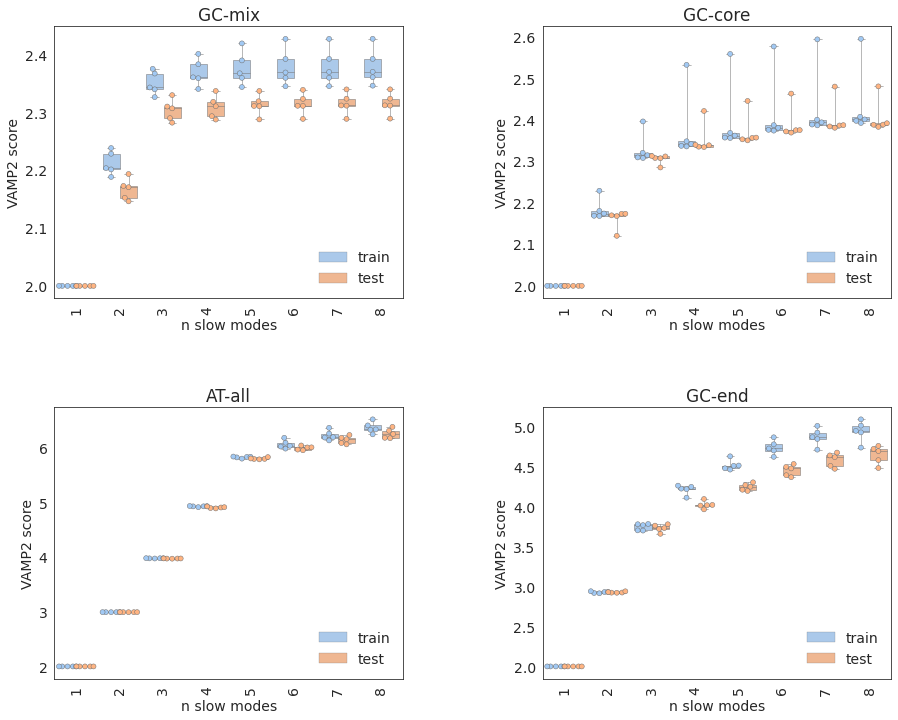

In [47]:
sns.set_style("white")
sns.set_palette('pastel')
plt.rcParams['font.size'] = 14

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharey = False)
epoch = 10

for i, seq in enumerate(df.seq.unique()):
    
    x, y = i//2, i%2
    ax = axes[x, y]
    ax.set_title(seq.split('_')[0].replace(f'ep-{epoch}', ''))
    df_seq = df[df.seq == seq]
    
    sns.boxplot(x="n_sm", y="score", hue="type", data=df_seq, ax=ax, whis=np.inf, linewidth=0.5)
    sns.swarmplot(x="n_sm", y="score", hue="type", data=df_seq, dodge=True, linewidth=0.5, ax=ax)

    ax.set_xlabel('n slow modes')
    ax.set_ylabel('VAMP2 score')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[0:2], labels[0:2], ncol=1, loc=4, frameon=False)
    
fig.subplots_adjust(hspace = 0.4, wspace=0.4)
plt.savefig(f'../paper_figs/allseq_cross_val_scores_lag-{lag}', dpi=300, bbox_inches='tight')